<font size='6'><b>Scalable Approximate Algorithms for Optimal Transport Linear Models: Plots</b></font>

# Init

In [1]:
import os, h5py, pylab as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
%pylab inline
%load_ext autoreload
%autoreload 2
import matplotlib as mpl
mpl.rcParams.update({"axes.grid" : True})
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.turbo(np.linspace(0,1,8)))
from scipy import sparse

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/var/folders/96/4c5n4tpd02l_82z2ppsmr5_40000gn/T/ipykernel_7472/3945061223.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')
/Users/tomaszk/pyvenv/miniconda3/envs/tfm1231030/lib/python3.11/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
from otlm.models import OTLM
from otlm import utils_plots
from sklearn.linear_model import Ridge, Lasso
from otlm.solvers import PoissonRegressorNoLogLink
from otlm.solvers import TVRegressor
import mendeleev as pt

(CVXPY) Apr 17 05:19:27 PM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 17 05:19:27 PM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.11.4210). Expected < 9.10.0. Please open a feature request on cvxpy to enable support for this version.')


In [3]:
def astr(x):
    return np.array2string(np.array(x), precision=4, max_line_width=100000, formatter={'float_kind': lambda x: f'{x:.4f}'})

# Figure 1 

                   w size=(3,) nnz=3 [100.00%] min=1.0000e+00 max=1.0000e+00 mean=1.0000e+00
                   K size=(100, 100) nnz=10000 [100.00%] min=2.1499e-22 max=6.6124e-03 mean=3.2564e-05
OTLM iter    0, diff: 6.26e+03, diff_w: 1.38e+00, tol: 1.00e-08
OTLM iter    1, diff: 2.21e+03, diff_w: 1.41e-01, tol: 1.00e-08
OTLM iter    2, diff: 6.24e+02, diff_w: 3.70e-02, tol: 1.00e-08
OTLM iter    3, diff: 2.36e+02, diff_w: 8.42e-03, tol: 1.00e-08
OTLM iter    4, diff: 1.02e+02, diff_w: 1.73e-03, tol: 1.00e-08
OTLM iter    5, diff: 4.63e+01, diff_w: 3.93e-04, tol: 1.00e-08
OTLM iter    6, diff: 2.15e+01, diff_w: 1.09e-04, tol: 1.00e-08
OTLM iter    7, diff: 1.01e+01, diff_w: 3.57e-05, tol: 1.00e-08
OTLM iter    8, diff: 4.78e+00, diff_w: 1.27e-05, tol: 1.00e-08
OTLM iter    9, diff: 2.27e+00, diff_w: 4.70e-06, tol: 1.00e-08
OTLM iter   10, diff: 1.07e+00, diff_w: 1.76e-06, tol: 1.00e-08
OTLM iter   11, diff: 5.09e-01, diff_w: 6.65e-07, tol: 1.00e-08
OTLM iter   12, diff: 2.41e-01, diff

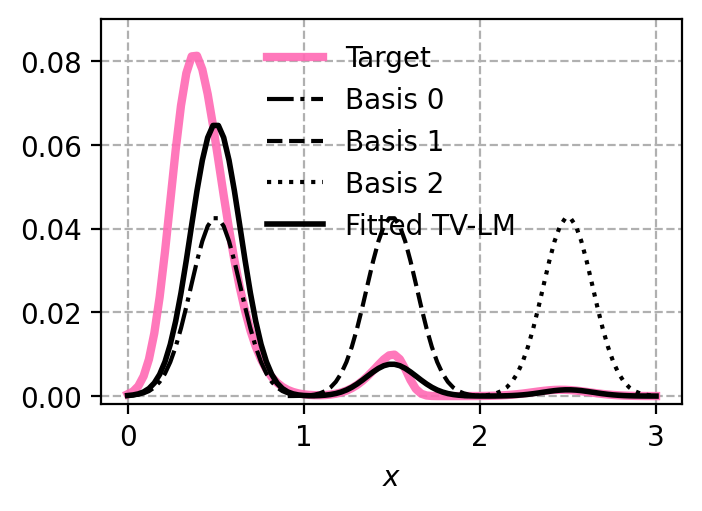

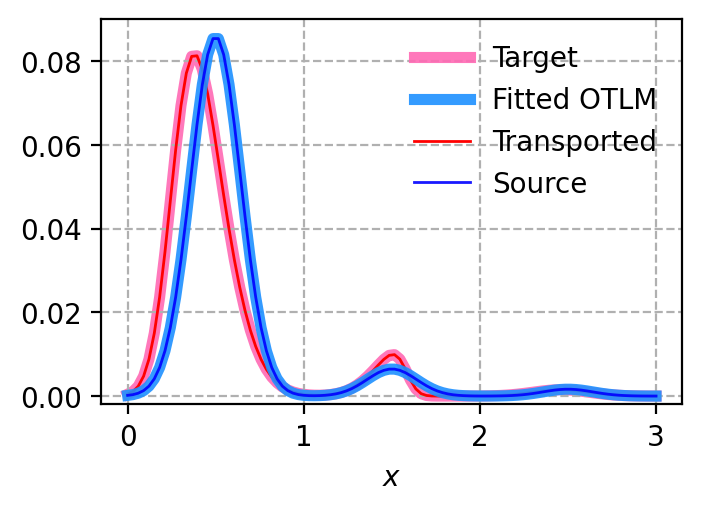

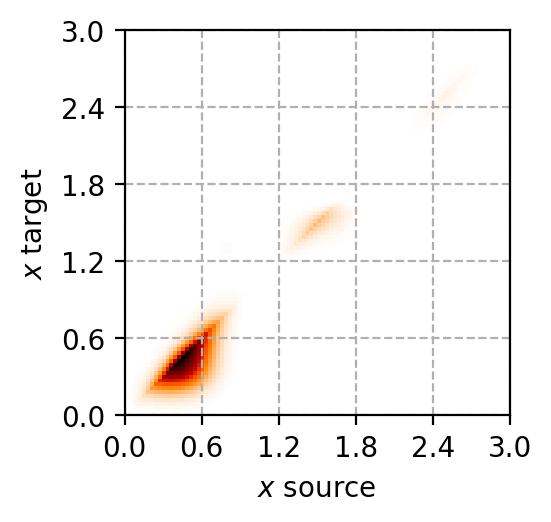

In [7]:
x, yt, X, C = utils_plots.get_demo_dataset_tv()
lm_tv = TVRegressor(alpha=0)
otlm_tv = OTLM(datafit='fix', penalty='no', λ=1, ε=0.001, max_iter=100, max_iter_mm=100, tol=1e-8, options={'disp': True})
otlm_tv.fit(C, X, yt)
lm_tv.fit(X, yt);
print('otlm_tv w', astr(otlm_tv.coef_))
print('lm_tv w  ', astr(lm_tv.coef_))
X_tv, yt_tv = X, yt

fig1, fig2, fig3 = utils_plots.plot_scenarios_3panels(x, yt, X, otlm_tv, lm_tv, log_plan=False, min_plan=0, ylim=[-0.002, 0.09]);

# Figure 2

## Ridge regression

In [8]:
x, yt, X, C = utils_plots.get_demo_dataset_ridge()
α = 1e-3
lm_ridge = Ridge(alpha=α, fit_intercept=False, positive=True, tol=1e-10)
otlm_ridge = OTLM(datafit='quadratic', penalty='l2', λ=1, ε=0.001, α=α/2, max_iter=500, tol=1e-8, options={'disp': True})
otlm_ridge.fit(C, X, yt)
lm_ridge.fit(X, yt);
print('otlm_ridge w', astr(otlm_ridge.coef_))
print('lm_ridge w  ', astr(lm_ridge.coef_))
X_ridge, yt_ridge = X, yt

                   w size=(3,) nnz=3 [100.00%] min=1.0000e+00 max=1.0000e+00 mean=1.0000e+00
                   K size=(100, 100) nnz=10000 [100.00%] min=5.0147e-20 max=7.1424e-03 mean=3.5060e-05
OTLM iter    0, diff: 3.24e+02, diff_w: 1.42e+00, tol: 1.00e-08
OTLM iter    1, diff: 3.72e+01, diff_w: 2.39e-01, tol: 1.00e-08
OTLM iter    2, diff: 1.97e+01, diff_w: 9.37e-02, tol: 1.00e-08
OTLM iter    3, diff: 9.28e+00, diff_w: 3.42e-02, tol: 1.00e-08
OTLM iter    4, diff: 3.62e+00, diff_w: 1.19e-02, tol: 1.00e-08
OTLM iter    5, diff: 1.32e+00, diff_w: 4.04e-03, tol: 1.00e-08
OTLM iter    6, diff: 4.69e-01, diff_w: 1.36e-03, tol: 1.00e-08
OTLM iter    7, diff: 1.66e-01, diff_w: 4.60e-04, tol: 1.00e-08
OTLM iter    8, diff: 5.86e-02, diff_w: 1.55e-04, tol: 1.00e-08
OTLM iter    9, diff: 2.07e-02, diff_w: 5.26e-05, tol: 1.00e-08
OTLM iter   10, diff: 7.29e-03, diff_w: 1.79e-05, tol: 1.00e-08
OTLM iter   11, diff: 2.57e-03, diff_w: 6.07e-06, tol: 1.00e-08
OTLM iter   12, diff: 9.09e-04, diff

## LASSO

In [9]:
x, yt, X, C = utils_plots.get_demo_dataset_lasso()
α = 7e-3
lm_lasso = Lasso(alpha=α/(len(yt)), fit_intercept=False, positive=True, tol=1e-8)
otlm_lasso = OTLM(datafit='quadratic', penalty='l1', λ=1, ε=0.0002, α=α, max_iter=1000, max_iter_mm=100, tol=1e-10, options={'disp': True})
otlm_lasso.fit(C, X, yt)
lm_lasso.fit(X, yt);
print('otlm_lasso w', astr(otlm_lasso.coef_))
print('lm_lasso w  ', astr(lm_lasso.coef_))
X_lasso, yt_lasso = X, yt

                   w size=(3,) nnz=3 [100.00%] min=1.0000e+00 max=1.0000e+00 mean=1.0000e+00
                   K size=(100, 100) nnz=10000 [100.00%] min=7.0210e-15 max=6.7830e-03 mean=5.3294e-05
OTLM iter    0, diff: 1.72e+02, diff_w: 1.73e+00, tol: 1.00e-10
OTLM iter    1, diff: 1.21e+21, diff_w: 2.80e+04, tol: 1.00e-10
OTLM iter    2, diff: 1.21e+21, diff_w: 2.80e+04, tol: 1.00e-10
OTLM iter    3, diff: 1.73e+14, diff_w: 2.01e-04, tol: 1.00e-10
OTLM iter    4, diff: 1.48e+13, diff_w: 8.23e-06, tol: 1.00e-10
OTLM iter    5, diff: 1.75e+12, diff_w: 8.49e-07, tol: 1.00e-10
OTLM iter    6, diff: 2.13e+11, diff_w: 1.02e-07, tol: 1.00e-10
OTLM iter    7, diff: 2.60e+10, diff_w: 1.25e-08, tol: 1.00e-10
OTLM iter    8, diff: 3.18e+09, diff_w: 1.52e-09, tol: 1.00e-10
OTLM iter    9, diff: 3.89e+08, diff_w: 1.86e-10, tol: 1.00e-10
OTLM fit finished in 10 iterations, diff: 4.76e+07 tol: 1.00e-10, diff_w: 2.27e-11
otlm_lasso w [0.8345 0.0128 0.0001]
lm_lasso w   [0.7582 0.0000 0.0000]


## Poisson

In [10]:
x, yt, X, C = utils_plots.get_demo_dataset_poisson()
α = 0.0001
lm_poisson = PoissonRegressorNoLogLink(alpha=α)
otlm_poisson = OTLM(datafit='poisson', α=α, penalty='l2', λ=100, ε=1, max_iter=200, tol=1e-10, options={'disp': True})
otlm_poisson.fit(C, X, yt)
lm_poisson.fit(X, yt);
print('otlm_poisson w', astr(otlm_poisson.coef_))
print('lm_poisson w  ', astr(lm_poisson.coef_))
X_poisson, yt_poisson = X, yt

                   w size=(3,) nnz=3 [100.00%] min=1.0000e+00 max=1.0000e+00 mean=1.0000e+00
                   K size=(100, 100) nnz=10000 [100.00%] min=9.3576e-18 max=9.6060e+03 mean=3.7480e+01
OTLM iter    0, diff: 5.54e+02, diff_w: 1.40e+00, tol: 1.00e-10
OTLM iter    1, diff: 5.72e+01, diff_w: 1.84e-01, tol: 1.00e-10
OTLM iter    2, diff: 2.45e+01, diff_w: 4.01e-02, tol: 1.00e-10
OTLM iter    3, diff: 1.36e+01, diff_w: 8.76e-03, tol: 1.00e-10
OTLM iter    4, diff: 7.00e+00, diff_w: 1.77e-03, tol: 1.00e-10
OTLM iter    5, diff: 3.30e+00, diff_w: 4.03e-04, tol: 1.00e-10
OTLM iter    6, diff: 1.47e+00, diff_w: 1.15e-04, tol: 1.00e-10
OTLM iter    7, diff: 6.31e-01, diff_w: 3.81e-05, tol: 1.00e-10
OTLM iter    8, diff: 2.64e-01, diff_w: 1.36e-05, tol: 1.00e-10
OTLM iter    9, diff: 1.09e-01, diff_w: 5.00e-06, tol: 1.00e-10
OTLM iter   10, diff: 4.43e-02, diff_w: 1.86e-06, tol: 1.00e-10
OTLM iter   11, diff: 1.79e-02, diff_w: 6.95e-07, tol: 1.00e-10
OTLM iter   12, diff: 7.22e-03, diff

## Combine

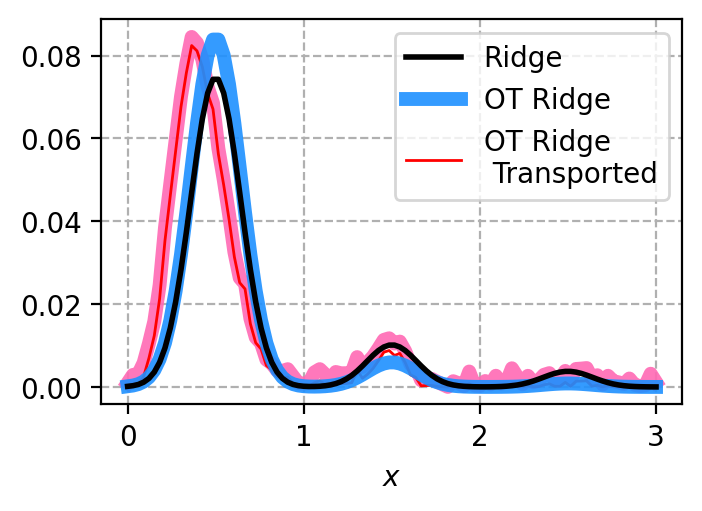

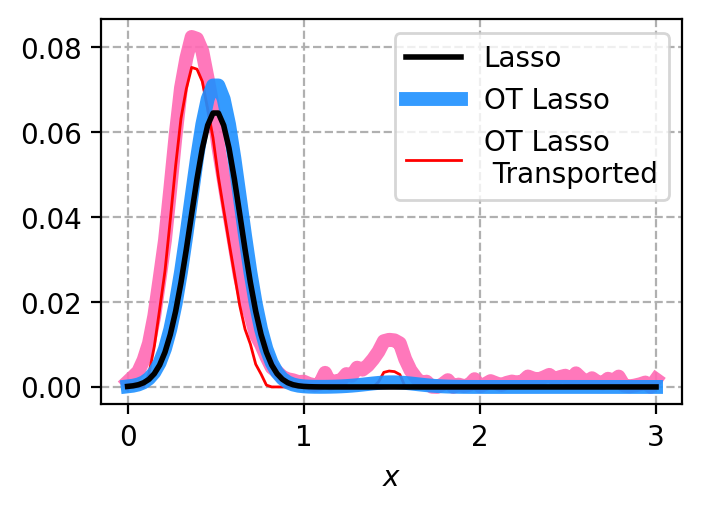

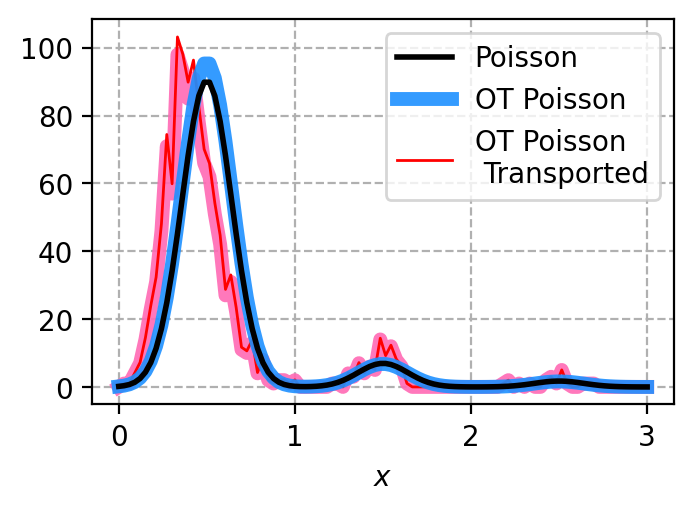

In [12]:
list_otlms = [otlm_ridge, otlm_lasso, otlm_poisson]
list_lms = [lm_ridge, lm_lasso, lm_poisson]
list_labels = [['Ridge', 'OT Ridge'], ['Lasso', 'OT Lasso'], ['Poisson', 'OT Poisson']]
list_ylim = [None, None, None]
list_yt = [yt_ridge, yt_lasso, yt_poisson]
list_X = [X_ridge, X_lasso, X_poisson]
figs = utils_plots.plot_multiple_scenarios(x, list_otlms, list_lms, list_labels, list_ylim, list_yt, list_X)


# Figure 3

['$\\epsilon$=5e-03', '$\\epsilon$=1e-02', '$\\epsilon$=1e-01', '$\\epsilon$=0 (QP solver)']


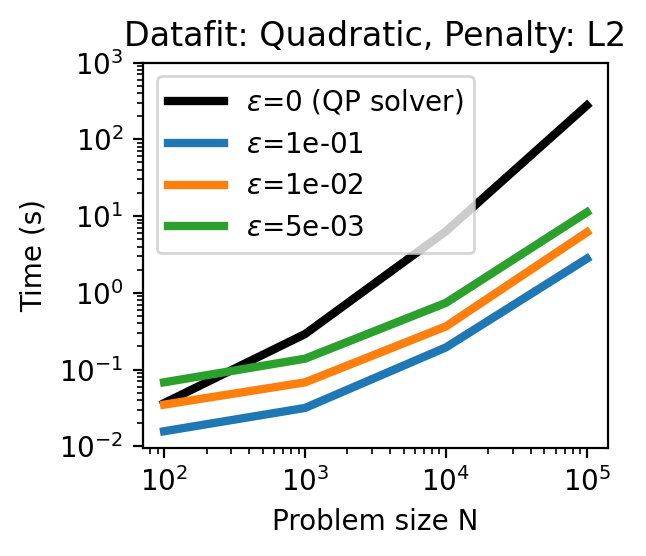

In [123]:
res_l2l2 = results['l2l2']
εs = [0.005, 0.01, 0.1]
fig = utils_plots.plot_time_scaling(res_l2l2['n_samples'], res_l2l2['times'], res_l2l2['weights'], ε=εs, title='Datafit: Quadratic, Penalty: L2', ylabel=True, ylim=[None, 1e3])

['$\\epsilon$=5e-03', '$\\epsilon$=1e-02', '$\\epsilon$=1e-01', '$\\epsilon$=0 (LP solver)']


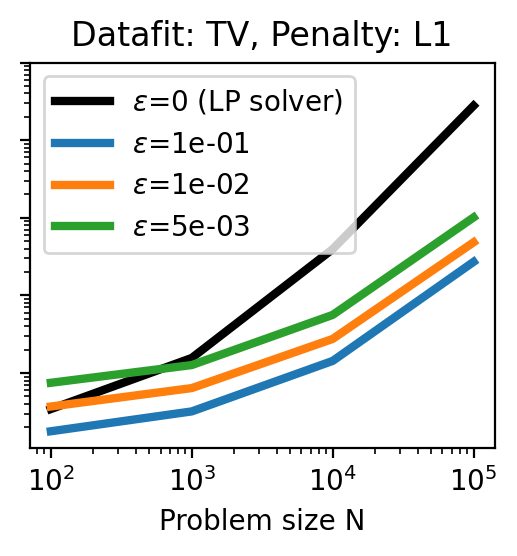

In [124]:
res_l1l1 = results['l1l1']
fig = utils_plots.plot_time_scaling(res_l1l1['n_samples'], res_l1l1['times'], res_l1l1['weights'], ε=εs, title='Datafit: TV, Penalty: L1', ylabel=None, ylim=[None, 1e3])


In [88]:
results = utils_plots.read_from_pickle('results_scaling_nsamples1_nreals1_neps8.pkl')

OTLM ε=5.00e-03
OTLM ε=7.67e-03
OTLM ε=1.18e-02
OTLM ε=1.81e-02
OTLM ε=2.77e-02
OTLM ε=4.25e-02
OTLM ε=6.52e-02
OTLM ε=1.00e-01


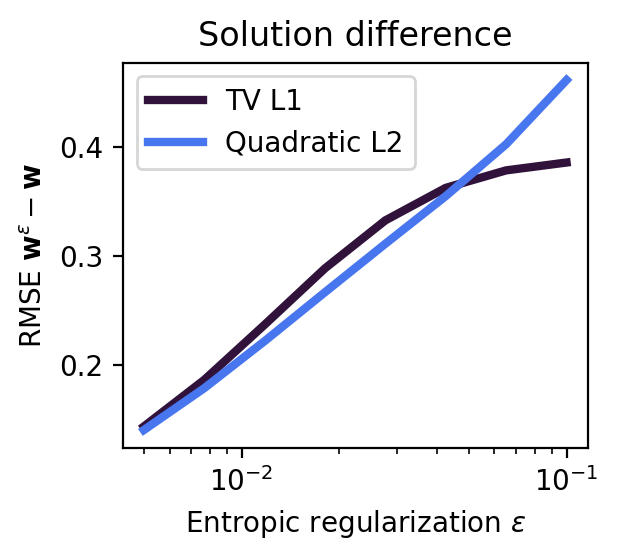

In [90]:
εs = np.logspace(np.log10(0.005), np.log10(0.1), 8)
cases = w_ref = results['l1l1']['weights'][0].keys()
w_ref1 = results['l1l1']['weights'][0]['LP solver']
w_ref2 = results['l2l2']['weights'][0]['QP solver']
ws1 = []
ws2 = []
for case in cases:
    if 'solver' in case:
        continue
    if '2.00e-03' in case:
        continue
    print(case)
    
    w_case = results['l1l1']['weights'][0][case]
    ws1.append(w_case)
    w_case = results['l2l2']['weights'][0][case]
    ws2.append(w_case)

fig = utils_plots.plot_w_diff(εs, weights=[ws1, ws2], weigths_ref=[w_ref1, w_ref2], labels=['TV L1', 'Quadratic L2'], title='Solution difference')


# Figure 4

In [103]:
posteriors = utils_plots.read_from_pickle('posteriors_v3.pkl')
samp_name = 'BCR-691-A_p45_dp2'
otlm, y, x, X = utils_plots.fit_mixe_single_sample(samp_name=samp_name, ε=0.1, α=0.1, ρ=500000, λ=1, max_dist=10, reg_type='kl', datafit='tv', penalty='l1', size_scale=1.1, plot=False, min_element_frac=0.04)

=============================== BCR-691-A_p45_dp2 ===============================
{'Cu': 0.78726, 'As': 0.0019399999999999999, 'Pb': 0.079, 'Sn': 0.0716, 'Zn': 0.060200000000000004}
['Cu', 'As', 'Pb', 'Sn', 'Zn']
x (9836,) y (9836,)
elements_true ['Cu', 'As', 'Pb', 'Sn', 'Zn']
muon_capture_prob {'Cu': 2.2, 'As': 2.89, 'Pb': 4.445830460232727, 'Sn': 3.0024470588235292, 'Zn': 3.17}
mask 0.04 ['Cu', 'As', 'Pb', 'Sn', 'Zn'] -> ['Cu', 'Pb', 'Sn', 'Zn']
                   w size=(34,) nnz=34 [100.00%] min=1.0000e+00 max=1.0000e+00 mean=1.0000e+00
                   K size=(9836, 9836) nnz=306960 [0.32%] min=0.0000e+00 max=1.0000e+00 mean=7.4421e-08
OTLM iter    0, diff: 1.62e+06, diff_w: 5.67e+00, tol: 1.00e-08
OTLM iter    1, diff: 1.62e+06, diff_w: 9.78e-01, tol: 1.00e-08
OTLM iter    2, diff: 4.40e+04, diff_w: 4.47e-02, tol: 1.00e-08
OTLM iter    3, diff: 1.92e+04, diff_w: 2.87e-02, tol: 1.00e-08
OTLM iter    4, diff: 1.07e+04, diff_w: 2.06e-02, tol: 1.00e-08
OTLM iter    5, diff: 5.49e+0

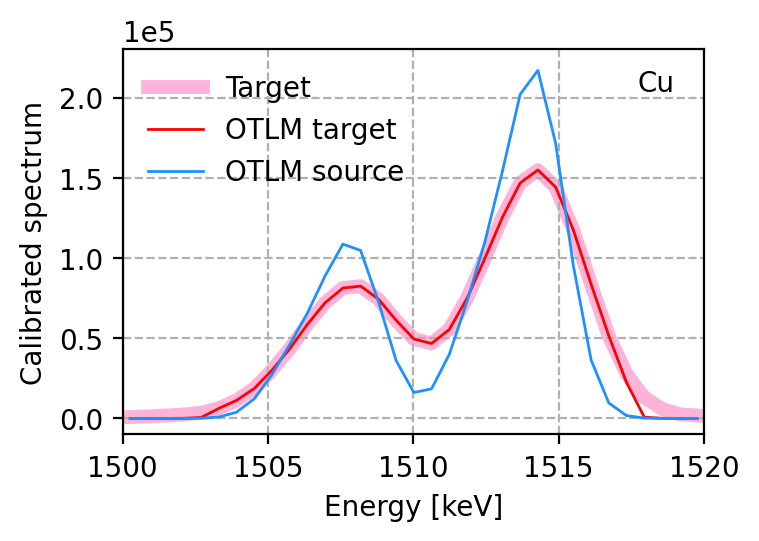

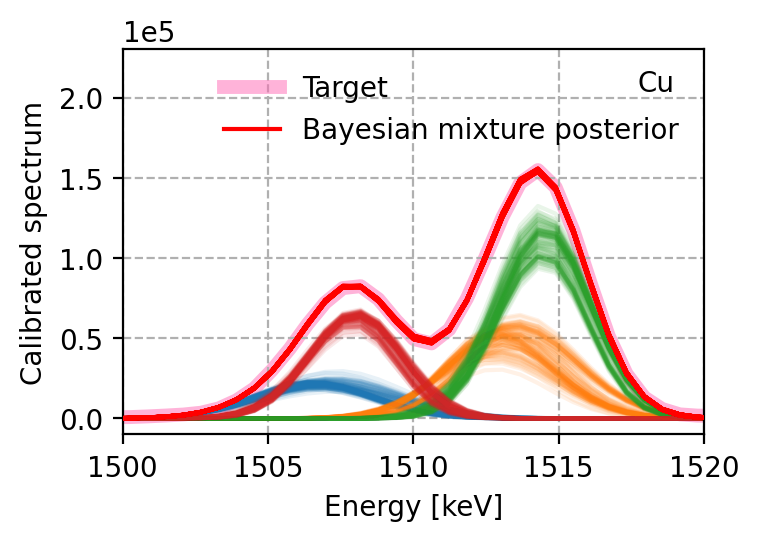

In [ ]:
fig = utils_plots.plot_mixe_data_fit_singlepanel(otlm, x, y, X, xlim=[1500, 1520], tag='Cu', ylim=[-1e4, 2.3e5])
fig.gca().set(xlim=[1500, 1520])
fig = utils_plots.plot_mixe_data_mcmc_singlepanel(posteriors[samp_name]['Cu'][0], x, y*otlm.norm_factor, xlim=[1500, 1520], tag='Cu', ylim=[-1e4,2.3e5])

# Figure 5

------------- BCR-691-A_p45_dp2: ['Cu' 'Pb' 'Sn' 'Zn']
(4,)
total Cu   :  1.7479e+06 +/-  2.9207e+03 frac_err  1.6710e-03    w_otlm  1.7124e+06 diff -1.2151e+01
      Cu  0:  1.6186e+05 +/-  6.1415e+04 frac_err  3.7944e-01 detect_sig   2.6355e+00   w_otlm  1.5884e+05 diff -4.9165e-02    pos_mean  1.5072e+03  pos_mudirac  1.5060e+03
      Cu  1:  3.9615e+05 +/-  7.0208e+04 frac_err  1.7723e-01 detect_sig   5.6425e+00   w_otlm  2.9004e+05 diff -1.5113e+00    pos_mean  1.5133e+03  pos_mudirac  1.5124e+03
      Cu  2:  7.2828e+05 +/-  6.6517e+04 frac_err  9.1335e-02 detect_sig   1.0949e+01   w_otlm  8.4089e+05 diff  1.6930e+00    pos_mean  1.5145e+03  pos_mudirac  1.5143e+03
      Cu  3:  4.6158e+05 +/-  5.2370e+04 frac_err  1.1346e-01 detect_sig   8.8138e+00   w_otlm  4.2260e+05 diff -7.4427e-01    pos_mean  1.5079e+03  pos_mudirac  1.5080e+03
(8,)
total Zn   :  1.6068e+05 +/-  1.2273e+03 frac_err  7.6381e-03    w_otlm  1.5700e+05 diff -3.0025e+00
      Zn  0:  1.8423e+04 +/-  1.0006e+04 

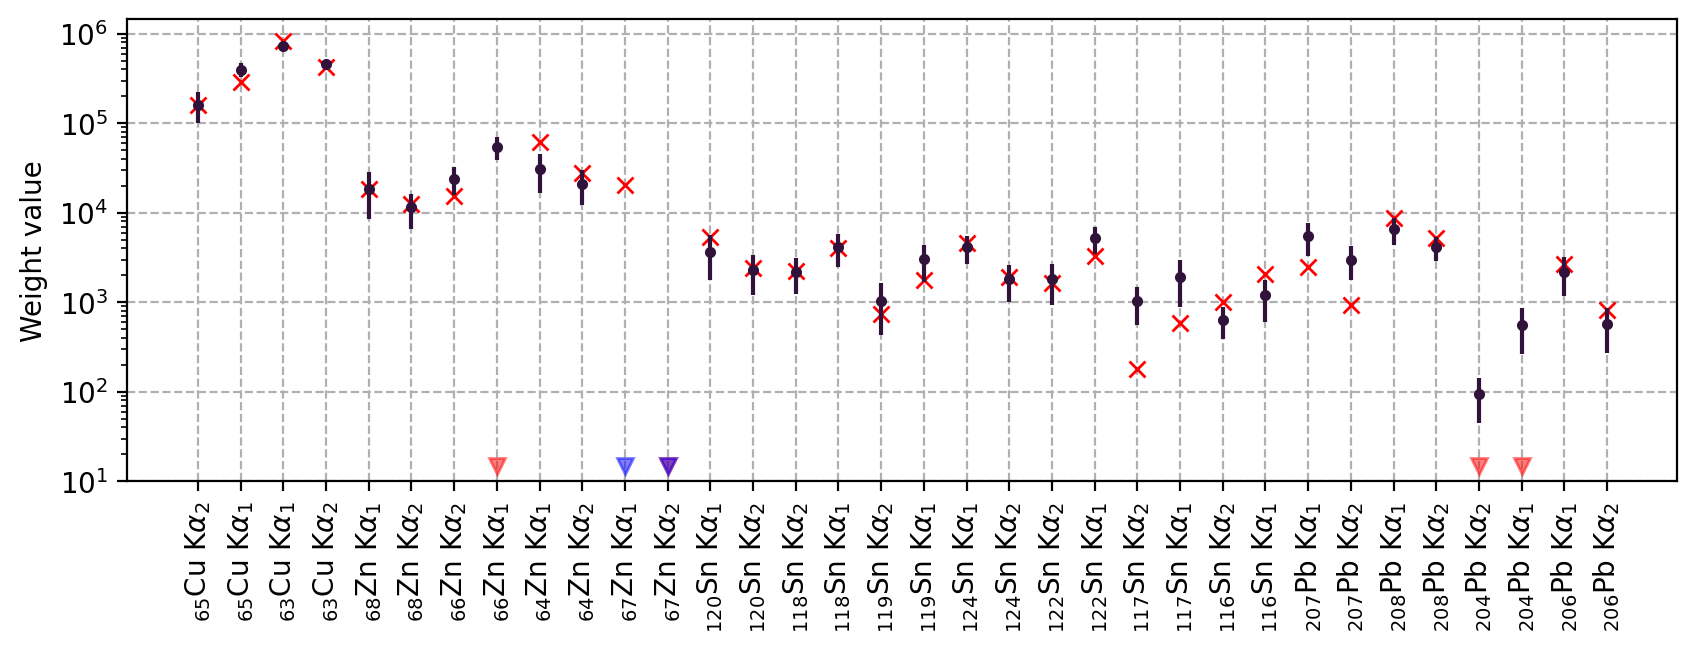

In [105]:
lines = utils_plots.get_mixe_fit_comparison_data(posteriors, otlm, samp_name=samp_name)
fig = utils_plots.plot_mixe_fit_comparison(lines, samp_name, ymin=1e1, figsize=(10,3))